# EDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [ ]:

df=pd.read_csv("Mall_Customers.csv")


df.head(50)



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# Drop the CustomerID column as it is not needed for clustering
df = df.drop(columns=['CustomerID'])


**Data Understanding**

In [ ]:
print(df.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Visualizing the Distribution of Variables**

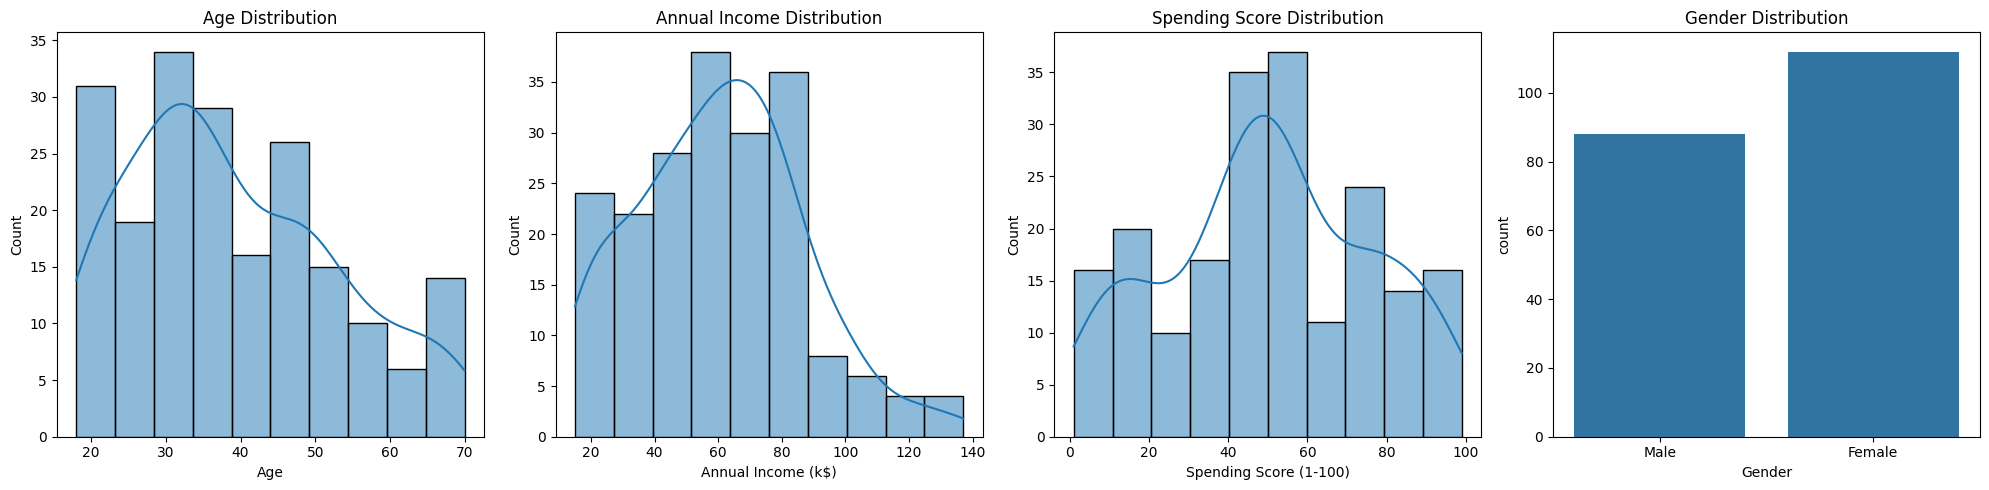

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))

# Age Distribution
plt.subplot(1, 4, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')

# Annual Income Distribution
plt.subplot(1, 4, 2)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('Annual Income Distribution')

# Spending Score Distribution
plt.subplot(1, 4, 3)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')

# Gender Distribution
plt.subplot(1, 4, 4)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


Age Distribution:
The age distribution shows a wide range of customers, mostly between 20 and 70 years old.
There seems to be a peak around the age of 30, with fewer customers in their 50s and 60s.The distribution is slightly left-skewed, with more younger customers than older ones.

Annual Income Distribution:
Most customers have annual incomes between 30k$ and 85k$, with a peak around 70k$.
there are fewer customers with very high incomes above 100k

The distribution shows a slight right-skew, indicating that higher-income customers are less common.

Spending Score Distribution:
The spending score is more balanced, with a higher concentration around 50-75.
There are fewer customers with very low (0-20) or very high (90-100) spending scores, though there is a notable number of customers with very high scores (90+)

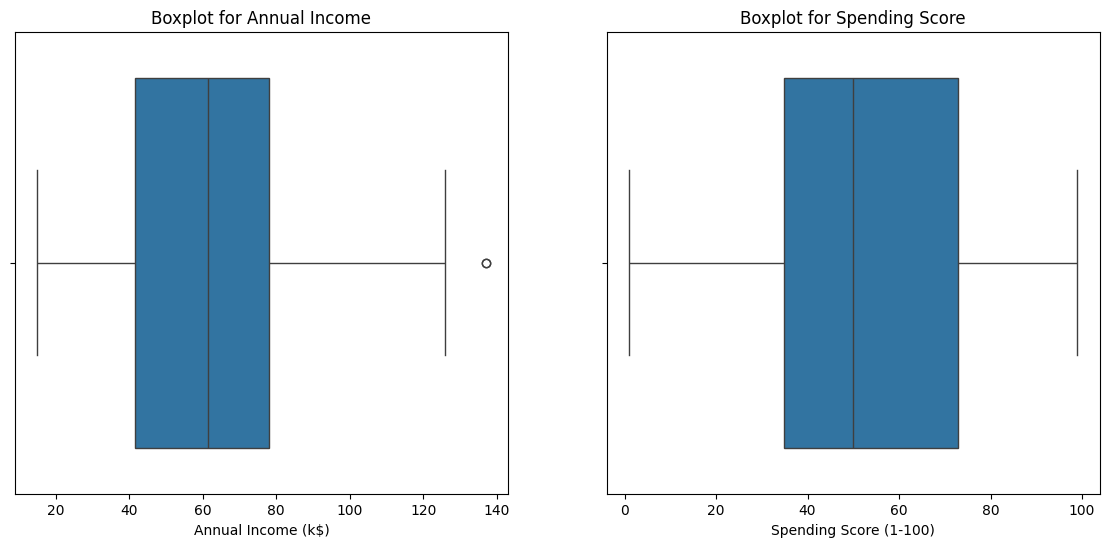

In [ ]:
# Visualizing outliers using boxplots
plt.figure(figsize=(14, 6))

# Boxplot for Annual Income
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Annual Income (k$)')
plt.title('Boxplot for Annual Income')

# Boxplot for Spending Score
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Spending Score (1-100)')
plt.title('Boxplot for Spending Score')

plt.show()


Handeling Outliers

In [ ]:
# Step 2: Function to count outliers based on IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Count initial outliers
initial_outliers_income = count_outliers_iqr(df, 'Annual Income (k$)')
initial_outliers_spending = count_outliers_iqr(df, 'Spending Score (1-100)')

# Step 3: Cap outliers based on the 1st and 99th percentiles
def cap_outliers_percentile(df, column):
    lower_percentile = df[column].quantile(0.01)
    upper_percentile = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_percentile, upper=upper_percentile)

cap_outliers_percentile(df, 'Annual Income (k$)')
cap_outliers_percentile(df, 'Spending Score (1-100)')

# Count outliers again after capping
final_outliers_income = count_outliers_iqr(df, 'Annual Income (k$)')
final_outliers_spending = count_outliers_iqr(df, 'Spending Score (1-100)')

# Print outlier counts
print(f"Initial Outliers in Annual Income: {initial_outliers_income}")
print(f"Initial Outliers in Spending Score: {initial_outliers_spending}")
print(f"Final Outliers in Annual Income (after capping): {final_outliers_income}")
print(f"Final Outliers in Spending Score (after capping): {final_outliers_spending}")


Initial Outliers in Annual Income: 2
Initial Outliers in Spending Score: 0
Final Outliers in Annual Income (after capping): 0
Final Outliers in Spending Score (after capping): 0


In [ ]:
# Calculate skewness
skewness_income = df['Annual Income (k$)'].skew()
skewness_spending = df['Spending Score (1-100)'].skew()

print(f"Skewness of Annual Income: {skewness_income}")
print(f"Skewness of Spending Score: {skewness_spending}")


Skewness of Annual Income: 0.2529191347960017
Skewness of Spending Score: -0.04597916630072223


A skewness value between -0.5 and 0.5 typically indicates that the data is approximately symmetric.
A value between 0.5 and 1 (or -0.5 and -1) indicates moderate skewness.
Values greater than 1 or less than -1 indicate significant skewness

Since both skewness values are within the range of -0.5 to 0.5:

No significant skewness exists in our data, meaning it should work well with clustering algorithms like K-means.

**Encoding**

In [ ]:
# Encode the Gender column using one-hot encoding
data = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Create Age groups (e.g., 18-25, 26-35, 36-45, 46-55, 56+)
bins_age = [17, 25, 35, 46, np.inf]
labels_age = ['18-25', '26-35', '36-45', '46+']
data['Age Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)

# Create Income groups (e.g., Low, Medium, High income based on the distribution)
bins_income = [0, 40, 70, 150]
labels_income = ['Low Income', 'Medium Income', 'High Income']
data['Income Group'] = pd.cut(data['Annual Income (k$)'], bins=bins_income, labels=labels_income)

# One-hot encode the new categorical features (Age Group and Income Group)
data = pd.get_dummies(data, columns=['Age Group', 'Income Group'], drop_first=True)



In [ ]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Age Group_26-35,Age Group_36-45,Age Group_46+,Income Group_Medium Income,Income Group_High Income
0,19,15.99,39.0,True,False,False,False,False,False
1,21,15.99,81.0,True,False,False,False,False,False
2,20,16.00,6.0,False,False,False,False,False,False
3,23,16.00,77.0,False,False,False,False,False,False
4,31,17.00,40.0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
195,35,120.00,79.0,False,True,False,False,False,True
196,45,126.00,28.0,False,False,True,False,False,True
197,32,126.00,74.0,True,True,False,False,False,True
198,32,126.11,18.0,True,True,False,False,False,True


<ipython-input-94-e91130484f1e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=data_filtered_age, palette='Set2')


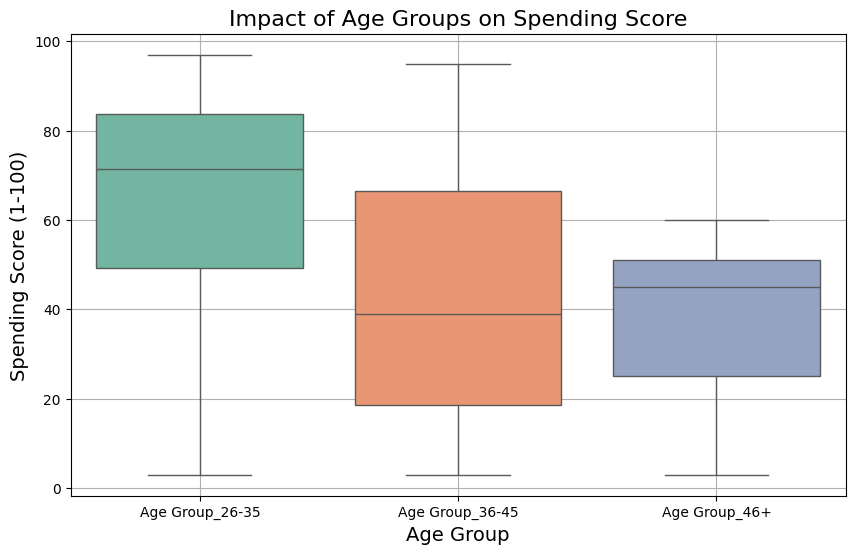

<ipython-input-94-e91130484f1e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Male', y='Spending Score (1-100)', data=data, palette='Set3')


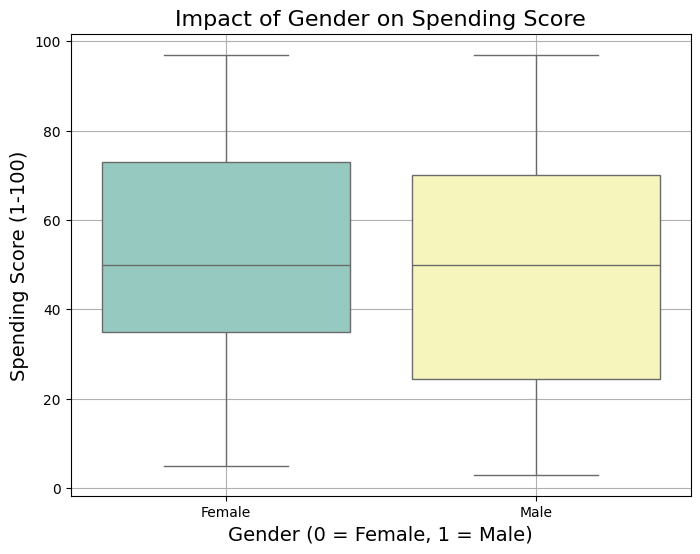

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Box Plot for Age Groups vs. Spending Score
plt.figure(figsize=(10, 6))
age_group_columns = ['Age Group_26-35', 'Age Group_36-45', 'Age Group_46+']
data_melted_age = data.melt(id_vars='Spending Score (1-100)', value_vars=age_group_columns, var_name='Age Group', value_name='Is_in_Age_Group')
data_filtered_age = data_melted_age[data_melted_age['Is_in_Age_Group'] == True]

sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=data_filtered_age, palette='Set2')
plt.title('Impact of Age Groups on Spending Score', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.grid(True)
plt.show()

# Step 2: Box Plot for Gender vs. Spending Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender_Male', y='Spending Score (1-100)', data=data, palette='Set3')
plt.title('Impact of Gender on Spending Score', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(True)
plt.show()




**Scaling**

In [ ]:
# Selecting relevant features for clustering
features = ['Income Group_Medium Income', 'Income Group_High Income',

             'Spending Score (1-100)']

# Standardizing the data to ensure fair comparison
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])


In [ ]:
scaled_data

array([[-0.78288136, -0.76635604, -0.43608697],
       [-0.78288136, -0.76635604,  1.19852403],
       [-0.78288136, -0.76635604, -1.72042419],
       [-0.78288136, -0.76635604,  1.04284679],
       [-0.78288136, -0.76635604, -0.39716766],
       [-0.78288136, -0.76635604,  1.00392748],
       [-0.78288136, -0.76635604, -1.72042419],
       [-0.78288136, -0.76635604,  1.70447506],
       [-0.78288136, -0.76635604, -1.83718212],
       [-0.78288136, -0.76635604,  0.84825024],
       [-0.78288136, -0.76635604, -1.40906971],
       [-0.78288136, -0.76635604,  1.82162218],
       [-0.78288136, -0.76635604, -1.3701504 ],
       [-0.78288136, -0.76635604,  1.04284679],
       [-0.78288136, -0.76635604, -1.44798902],
       [-0.78288136, -0.76635604,  1.12068541],
       [-0.78288136, -0.76635604, -0.59176421],
       [-0.78288136, -0.76635604,  0.61473439],
       [-0.78288136, -0.76635604, -0.82528007],
       [-0.78288136, -0.76635604,  1.82162218],
       [-0.78288136, -0.76635604, -0.591

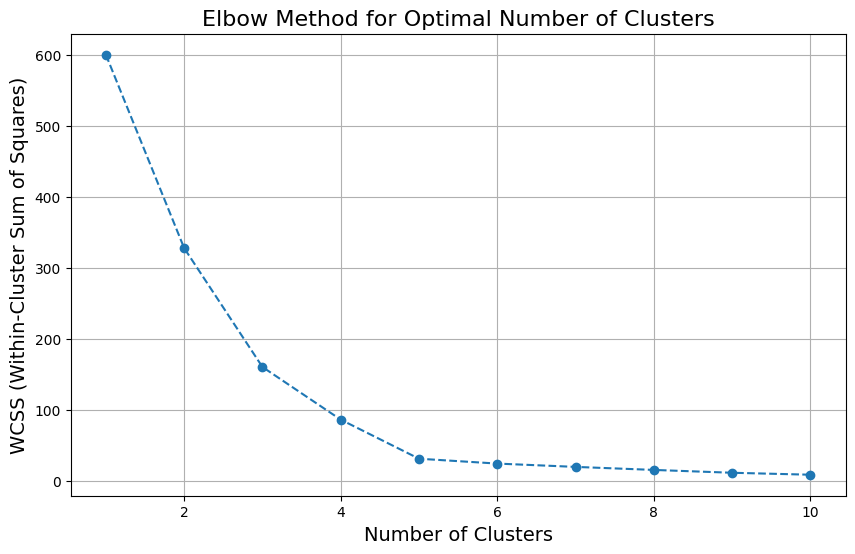

In [ ]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph to identify the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

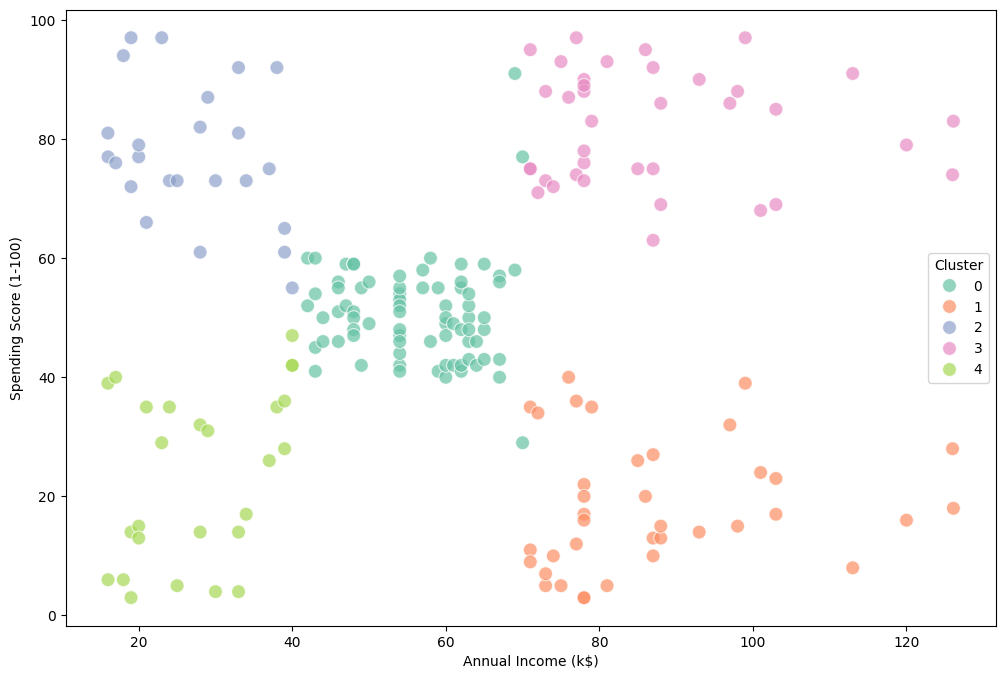

In [ ]:
optimal_clusters = 5  # Adjust this number based on the Elbow plot result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 7: Visualization of the Clusters
plt.figure(figsize=(12, 8))

# Plotting with enhanced colors and cluster separation
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='Set2', data=data, s=100, alpha=0.7)


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score for the clustering: {silhouette_avg}')


Silhouette Score for the clustering: 0.7816800172537345
